# Garbage Classifier - Training Notebook

<a target="_blank" href="https://colab.research.google.com/github/WholeNow/Garbage_Classifier/blob/main/notebooks/training.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import sys

# Environment detection
try:
    import google.colab
    IS_COLAB = True
except ImportError:
    IS_COLAB = False

if IS_COLAB:
    BASE_PATH = "/content"
    
    # Clone repository
    repo_name = "Garbage_Classifier"
    repo_url = "https://github.com/WholeNow/Garbage_Classifier.git"
    repo_path = os.path.join(BASE_PATH, repo_name)

    if not os.path.exists(repo_path):
        !git clone {repo_url}

    BASE_PATH = repo_path
    os.chdir(BASE_PATH)
    if BASE_PATH not in sys.path:
        sys.path.insert(0, BASE_PATH)
    
    print(f"Colab environment initialized: {BASE_PATH}")
else:
    # If local, assume the execution directory is 'notebooks' and move one level up
    BASE_PATH = os.getcwd()
    BASE_PATH = os.path.abspath(os.path.join(BASE_PATH, os.pardir)) 
    # Put project root first to avoid stdlib name collisions
    if BASE_PATH not in sys.path:
        sys.path.insert(0, BASE_PATH)
    print(f"Local environment initialized: {BASE_PATH}")

Local environment initialized: /Users/marcopilia/Desktop/Garbage_Classifier


/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/e

[INFO] Seed set: 42
[INFO] Device: MPS (Apple Silicon)
[TRAIN] Starting training of GC2
qui
[INFO] Dataset -> Train: 9730, Val: 2085, Test: 2086


Epoch 0 | LR: 0.000600 | Val Loss: 32.4040 | Val Acc: 15.83%



[TRAIN] Training interrupted by user (Ctrl+C).
[INFO] Training metrics saved to 'out/training_metrics.png'


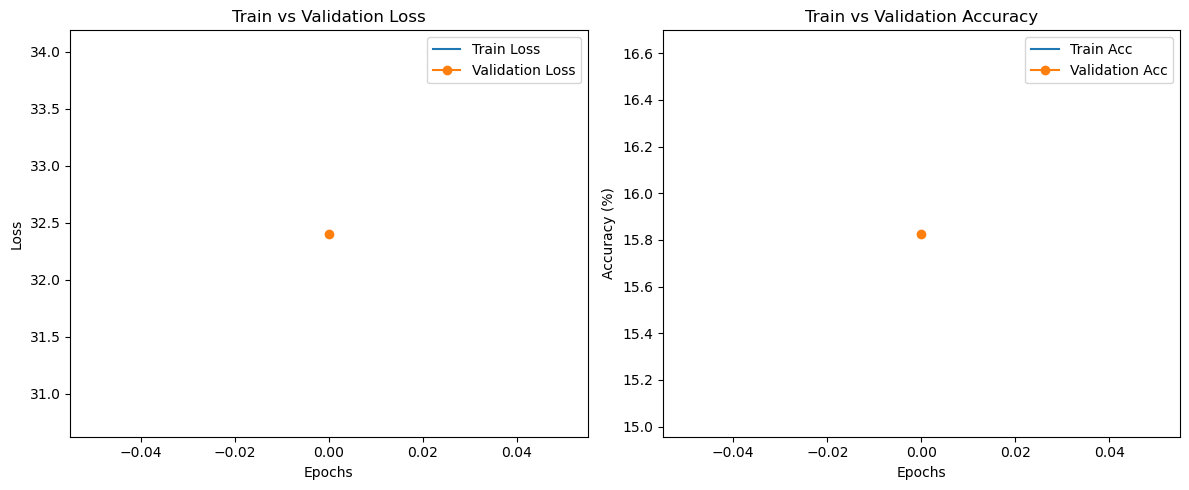

/Users/marcopilia/Desktop/Garbage_Classifier/utils.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=device)


--> Last Model Saved at out/GC2_no_reg.pth
[TRAIN] Completed.
[INFO] Post-train test using checkpoint: out/GC2_no_reg.pth


Testing:  73%|███████▎  | 48/66 [00:03<00:01, 15.59it/s]

In [ ]:
from config import TrainConfig
from train import train

config = TrainConfig(
    # Paths and Model
    root_dir='images',      
    model_name='GC2',
    pretrained=True,
    output_dir="out",
    run_test_after_train=True,
    split_file="splits.json",

    # Hyperparameters
    batch_size=32,
    num_epochs=75,
    val_epochs=5,
    learning_rate=0.0006,

    # Scheduler (Step Decay)
    step_size=10,
    gamma=0.5,

    # Regularization (if you want to remove one or both, set the respective lambda to 0)
    l1_lambda = 0.00005,
    l2_lambda = 0.0008,

    # Split Dataset
    val_split=0.15,
    test_split=0.15,

    # Input Images
    img_size=256,

    # Normalization
    compute_stats=False,
    mean=[0.6582812666893005, 0.6344856023788452, 0.6075275540351868],
    std=[0.6582812666893005, 0.6344856023788452, 0.6075275540351868],

    # System
    seed=42,
    num_workers=0,
    device="auto",
    checkpoint_path="GC2_no_reg.pth",
)


train(config)